# Appendix

In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.integrate as integrate

sns.set(style="white")

## Appendix 1

Python implementation of the continuous Bernoulli distributions: $\mathcal{CB}(L)$, parametrized by the log odds L and adjusted to the [-1,1] interval.

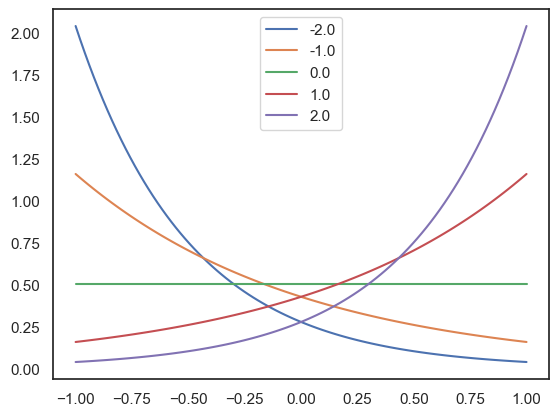

In [2]:
def CB(x, L, logodds=True):
    if not logodds:
        L=np.log(L/(1-L))
    if np.isclose(L, 0):
        return np.ones_like(x)/2
    else:
        return L * np.exp(L*x) / (2*np.sinh(L)) 
    
# Plot some examples
delta = 100
sigma = np.linspace(-1, 1, delta)
for L in np.linspace(-2, 2, 5):
    p_sigma = CB(sigma, L)
    sns.lineplot(x=sigma, y=p_sigma, label=L)

## Appendx 2

Derivation of the exponential form of the continuous Bernoulli distribution, parametrized by the log odds L and adjusted to the [-1,1] interval.

$P(x; L) = \frac{e^{Lx}}{\int_{-1}^1 e^{Lx}} = \frac{e^{Lx}}{ \frac{e^L - e^{-L}}{L}} = L \frac{e^{Lx}}{2sinh(L)}$



## Appendix 3

Visualization of the likelihood function with various parameters, in python.

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\m'
/var/folders/rc/b4064_3d4dj60wt9y_447fyr0000gn/T/ipykernel_37373/3653848797.py:8: SyntaxWarning: invalid escape sequence '\m'
  sns.lineplot(x=s_i, y=p_mu, ax=axes[idx], label=w_i).set(title=f"$\mu={mu}$")


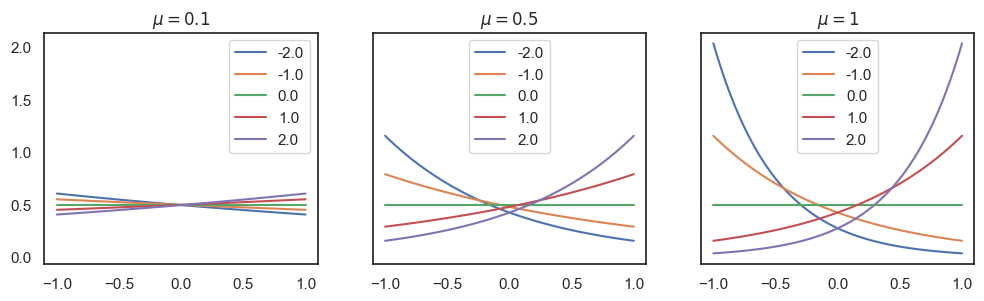

In [3]:
delta = 100
s_i = np.linspace(-1, 1, delta)

fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for idx, mu in enumerate([0.1, 0.5, 1]):
    for w_i in np.linspace(-2, 2, 5):
            p_mu = CB(s_i, w_i*mu)
            sns.lineplot(x=s_i, y=p_mu, ax=axes[idx], label=w_i).set(title=f"$\mu={mu}$")

## Appendix 4

We can write up the direct conditional probability describing $\sigma_i$ given $\sigma_j$ by marginalizing out the sensory and active states:
\
\
$
P(\sigma_i | \sigma_j) = \int P(\sigma_i | s_{ij}) P(s_{ij} | \sigma_j) \, d s_{ij} \\
= \int e^{(s_{ij}+b_i)\sigma_i} \delta( s_{ij} - J_{ij} \sigma_j ) d s_{ij} \\
= e^{(b_i + J_{ij}\sigma_j)\sigma_i}
$
\
\
Given that $P(\sigma_i, \sigma_j) = P(\sigma_i | \sigma_j) P(\sigma_j)$, and using equations [](prior-sigma) and [](sigma-given-mu), we can express the joint distribution as follows:
\
\
$
P(\sigma_i , \sigma_j) = e^{(b_i + J_{ij}\sigma_j)\sigma_i} e^{ b_j \sigma_j}
= e^{b_i \sigma_i + J_{ij} \sigma_i \sigma_j + b_j \sigma_j}
$
\
\
Next, we observe that the states $s$ and $a$ are the 'blanket states' of the system, forming a Markov blanket {cite:p}`https://doi.org/10.1016/j.neubiorev.2021.02.003`, which implies that the joint probability for all $\bm{\sigma}$ nodes can be written as the product of the individual joint probabilities ([](fig-concept)C), $\prod_{ij} P(\sigma_i, \sigma_j)$, which results in:
\
\
$$
P(\bm{\sigma}) \propto e^{\sum_{i} b_i \sigma_i + \sum_{ij} J_{i \neq j}\sigma_i\sigma_j}
$$



## Appendix 5

:::{math}
\mathbb{E}_{\mathcal{CB}(b)}[\sigma] &= \int \sigma \frac{ e^{b \sigma} }{ 2sinh(b) } d \sigma
&= \frac{ b \left( \frac{(b-1)e^b}{b^2} + \frac{(b+1)e^-b}{b^2} \right) }{ 2sinh(b) } \\
&= \coth(b) - \frac{1}{b}
:::

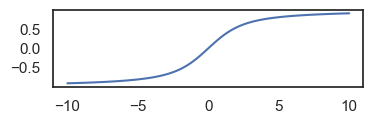

In [10]:
#| label: si-sigmoid
bs = np.linspace(-10, 10, 100)
plt.figure(figsize=(4, 1))
sns.lineplot(x=bs, y=1/np.tanh(bs) - 1/bs) # coth(b) - 1/b == 1/2 sech^2(b)
plt.show()

## Appendix 6

Let $x ∈ ℝ^n$ denote the system’s states (internal, blanket, and external states). 
The drift can be decomposed into a gradient part (from a potential U) and a solenoidal part R:
\
\
$ẋ = −∇U(x) + R(x)$
\
\
where $R = −Rᵀ$ is antisymmetric in state‐space.
\
\
The probability density $p(x, t)$ over states evolves according to the Fokker–Planck equation:
\
\
$∂ₜp(x,t) = −∇ · [ (−∇U + R) p(x,t) ] + diffusion terms.$
\
\
Because $R$ is antisymmetric $(∇ · (R p(x)) = 0)$ under the blanket‐partition constraints, we get
\
\
$∇ · (R p) = R : ∇p + p ∇ · R = 0$
\
\
(the colon denotes contraction). For a generic network, that term may not vanish—but the Markov‐blanket factorization forces any solenoidal flow to be purely tangential (no radial component in probability space).
\
\
In steady state $(∂ₜp = 0)$, only the gradient term $−∇U$ influences $p(x)$. The stationary (nonequilibrium) distribution is
\
\
$ p(x) ∝ exp{ −U(x) }$,
\
\
determined solely by the symmetric (potential) part −∇U. The antisymmetric $R$ does not reweight $p(x)$; it just circulates probability around isocontours of $U$.

In most NESS systems, antisymmetric flows do alter the stationary measure. Under particular‐partition (Markov‐blanket) constraints, however, the internal–external factorization ensures that solenoidal (antisymmetric) flows remain divergence‐free, leaving the Boltzmann‐like steady distribution intact.
This is why, in these Markov‐blanketed systems, one can have persistent solenoidal currents (nonequilibrium flows) yet preserve a stationary distribution that depends only on the symmetric part of the couplings.



## Appendix 7
\
\
**Derivation of $\dfrac{\partial F}{\partial b_q}$**
\
\
**1. Subsitute our parametrization into F**
\
\
Let's start with substituting our parametrization into eq. [](#f-complexity-accuracy).
\
\
**1a. Accuracy term**
\
\
From the RBM marginalization (eq. [](#rmb-to-hopfield)):
\
\
$
E(\bm{\sigma}) = \underbrace{-b_i\sigma_i - \sum_{j\neq i}J_{ij}\sigma_i\sigma_j}_{\text{Terms with } \sigma_i} \underbrace{-\sum_{j\neq i}b_j\sigma_j - \frac{1}{2}\sum_{j,k\neq i}J_{jk}\sigma_j\sigma_k}_{\text{Terms without } \sigma_i}
$
\
\
Here, $-b_i\sigma_i$ becomes constant, since $\sigma_i$ is fixed. So we get:
\
\
$
P(\sigma_{\backslash i}|\sigma_i) \propto \exp\left(\sum_{j\neq i}(b_j + J_{ij}\sigma_i)\sigma_j + \frac{1}{2}\sum_{j,k\neq i}J_{jk}\sigma_j\sigma_k\right)
$
\
\
Taking expectation of $\ln P(\sigma_{\backslash i}|\sigma_i)$ under $q(σ_i)$:
\
\
$
\mathbb{E}q[\ln P(σ_{\backslash i}|σ_i)] = \text{const} + \sum_{j\neq i}b_jσ_j + S(b_q)\sum_{j\neq i}J_{ij}σ_j + \frac{1}{2}\sum_{j,k\neq i}J_{jk}σ_jσ_k
$
\
\
Where $S(b_q) = \mathbb{E}_q[σ_i] = \coth b_q - 1/b_q$ is the expected value of the $\mathcal{CB}$, a sigmoid function of the bias (#supplementary-information-4)).
\
\
**1b. Complexity term**
\
\
The complexity term in eq. [](#f-complexity-accuracy) is simply the KL-divergence term between two $\mathcal{CB}$ distributions. For $\mathcal{CB}$ distributions: 
\
\
$q(x) = \frac{b_q}{2\sinh b_q}e^{b_q x},\quad p(x) = \frac{b}{2\sinh b}e^{b x}$
\
\
• KL divergence definition:
\
\
$
D_{KL} = \int_{-1}^1 q(x) \ln\frac{q(x)}{p(x)} dx = \mathbb{E}_q[\ln q(x) - \ln p(x)]
$
\
\
• Expand log terms:
\
\
$
\ln q(x) = \ln b_q - \ln(2\sinh b_q) + b_q x
$
\
\
$
\ln p(x) = \ln b - \ln(2\sinh b) + b x
$
\
\
• Subtract log terms:
\
\
$
\ln\frac{q(x)}{p(x)} = \ln\frac{b_q}{b} + \ln\frac{\sinh b}{\sinh b_q} + (b_q - b)x
$
\
\
• Take expectation under q(x):
\
\
$
D_{KL} = \ln\frac{b_q}{b} + \ln\frac{\sinh b}{\sinh b_q} + (b_q - b)\mathbb{E}_q[x]
$
\
\
• Compute expectation $\mathbb{E}_q[x]$:
\
\
$
\mathbb{E}_q[x] = \int_{-1}^1 x \frac{b_q e^{b_q x}}{2\sinh b_q} dx = \frac{1}{2\sinh b_q}\left[\frac{e^{b_q x}}{b_q^2}(b_q x - 1)\right]_{-1}^1
$
\
\
• Evaluate at bounds:
\
\
$
= \frac{1}{2\sinh b_q}\left(\frac{e^{b_q}(b_q - 1) - e^{-b_q}(-b_q - 1)}{b_q^2}\right)
$
\
\
• Simplify using hyperbolic identities:
\
\
$
= \frac{(b_q \cosh b_q - \sinh b_q)}{b_q^2 \sinh b_q} = \coth b_q - \frac{1}{b_q}
$
\
\
• Final substitution for the complexity term:
\
\
$
D_{KL} = \ln\frac{b_q \sinh b}{b \sinh b_q} + (b_q - b)\left(\coth b_q - \frac{1}{b_q}\right)
$
\
\
**1c. Combining the two terms**
\
\
Combining the two terms, we get the following expression for the free energy:
\
\
$
F = \ln\left(\frac{b_q}{b}\right) + \ln\left(\frac{\sinh(b)}{\sinh(b_q)}\right) + (b_q - b) S(b_q) - \sum_{j \ne i} \left( b_j + S(b_q) J_{ij} \right) \sigma_j - \dfrac{1}{2} \sum_{j \ne i} \sum_{k \ne i} J_{jk} \sigma_j \sigma_k + C
$
\
\
where C denotes all constants in the equation that are independent of $\sigma or b_q$.
\
\
**2. Free Energy partial derivative calculation**
\
\
• First, we differentiate the log terms:
\
\
$
\frac{\partial}{\partial b_q}\left[\ln\frac{b_q}{b} + \ln\frac{\sinh b}{\sinh b_q}\right] = \frac{1}{b_q} - \coth b_q
$
\
\
• Then, the KL core term:
\
\
$
\frac{\partial}{\partial b_q}\left[(b_q - b)S(b_q)\right] = S(b_q) + (b_q - b)\frac{dS}{db_q}
$
\
\
• The linear terms:
\
\
$
\frac{\partial}{\partial b_q}\left[-\sum_{j≠i}(b_j + S(b_q)J_{ij})\sigma_j\right] = -\sum_{j≠i}J_{ij}\sigma_j\frac{dS}{db_q}
$
\
\
• The constants vanish.
\
\
• Now, combining all terms:
\
\
$
\frac{\partial F}{\partial b_q} = \left(\frac{1}{b_q} - \coth b_q\right) + \left(S(b_q) + (b_q - b)\frac{dS}{db_q}\right) - \sum_{j≠i}J_{ij}\sigma_j\frac{dS}{db_q}
$
\
\
• Substituting $S(b_q) = \coth b_q - 1/b_q$:
\
\
$
= \left(\frac{1}{b_q} - \coth b_q\right) + \left(\coth b_q - \frac{1}{b_q} + (b_q - b)\frac{dS}{db_q}\right) - \sum_{j≠i}J_{ij}\sigma_j\frac{dS}{db_q}
$
\
\
• Cancel terms:
\
\
$
\cancel{\frac{1}{b_q}} \cancel{- \coth b_q} + \cancel{\coth b_q} \cancel{- \frac{1}{b_q}} + (b_q - b)\frac{dS}{db_q} - \sum_{j≠i}J_{ij}\sigma_j\frac{dS}{db_q}
$
\
\
Gives us the **final derivative**:
\
\
$
\frac{∂F}{∂b_q} = \left(b_q - b - \sum_{j\neq i}J_{ij}σ_j\right)\frac{dS}{db_q}
$
\
\
Where $\frac{dS}{db_q} = -csch^2 b_q + \frac{1}{b_q^2}$.
\
\
Setting the derivative to zero and solving for $b_q$, we get:
$
b_q = b + \sum_{j \ne i} J_{ij} \sigma_j
$
\
\
Now we remember that the expected value of the $\mathcal{CB}$ is the Langevin function of its bias -, $\mathbb{E}(x) = coth(b) - 1/b$ ([](#supplementary-information-4)). For simplicity, we will denote it as $L(x)$. Now we can write:
\
$
\mathbb{E}_{q}[\sigma_i] = L(b_q) = L \left( b + \sum_{j \ne i} J_{ij} \sigma_j \right)
$
\
\
**Q.E.D.**




## Appendix 10  

The explanation from {cite}`https://doi.org/10.1016/j.physrep.2019.03.001` for integrating out the integrator nodes of the RBM is
presented here for completeness. 
\
\
$E(\sigma) = - \log \int d\mu_j e^{-E(\sigma,\mu)}
= - \sum_i b_i(\sigma_i) - \sum_j \log \int d\mu_j e^{\beta_j(\mu_j) + \sum_i \sigma_i W_{ij} \mu_j}$
\
\
To understand what correlations are captured by  $p(\sigma)$, it is helpful to introduce the distribution:
\
\
$
q_j(\mu_j) = e^{\beta_j(\mu_j)}
$ \
\
of hidden units  $\mu_j$ , ignoring the interactions between  $\sigma$  and  $\mu$ , and the cumulant generating function:
\
\
$ \
K_j(t) = \log \int d\mu_j q_j(\mu_j) e^{t \mu_j} = \sum_n \kappa^{(n)}_j \frac{t^n}{n!}
$ \
\
$K_j(t)$  is defined such that the  $n$-th cumulant is  $\kappa^{(n)}j = \frac{\partial^n}{\partial t^n} K_j \Big|{t=0}$ .
\
\
The cumulant generating function appears in the marginal free energy of the visible units, which can be rewritten (up to a constant term) as:
\
\
$
E(\sigma) = - \sum_i b_i(\sigma_i) - \sum_j K_j\left(\sum_i W_{ij} \sigma_i\right) \\
= - \sum_i b_i(\sigma_i) - \sum_j \sum_n \kappa^{(n)}_j \frac{\left(\sum_i W_{ij} \sigma_i\right)^n}{n!} \\
= - \sum_i b_i(\sigma_i) - \sum_i \left(\sum_j \kappa^{(1)}_j W_{ij}\right) \sigma_i \\
\quad - \frac{1}{2} \sum_{ij} \left(\sum_j \kappa^{(2)}_j W_{ij} W_{ji}\right) \sigma_i \sigma_j + \dots 
$ 
\
\
We see that the marginal energy includes all orders of interactions between the visible units, with the  $n$-th order cumulants of  $q_j(\mu_j)$  weighting the $n$-th order interactions between the visible units. In the case of the Hopfield model we discussed previously,  $q_j(\mu_j)$  is a standard Gaussian distribution where the mean is  $\kappa^{(1)}_j = 0$, the variance is  $\kappa^{(2)}_j = 1$, and all higher-order cumulants are zero. Plugging these cumulants the above equation recovers eq. [](multiple-integrator-joint).

## Supplementary Information 11

From, eq. [](multiple-integrator-joint), we get:
\
\
$
P(\sigma_A, \sigma_V, \mu) \propto e^{b_A\sigma_A + b_V\sigma_V + \mu (\sigma_A + \sigma_V) - \frac{1}{2} \mu^2}
$\
\
If there is no causal relationship between the two features, the integrator node should not be activated, i.e. $\mu = 0$. In this case, the joint distribution simplifies to:
\
\
$
P(\sigma_A, \sigma_V, \mu=0) \propto e^{b_A \sigma_A + b_V\sigma_V} = e^{b_A\sigma_A} e^{ b_V\sigma_V}
$
\
\
This shows that in this case the joint distribution of $\sigma_A$ and $\sigma_V$ is independent of any interaction between the two events. Each event contributes separately to the distribution, with no term linking $\sigma_A$ and $\sigma_V$. Therefore:
\
\
$
P(\sigma_A | \sigma_V, \mu = 0) = \frac{P(\sigma_A, \sigma_V | \mu = 0)}{P(\sigma_V | \mu = 0)}
$
\
\
Since $P(\sigma_A, \sigma_V | \mu = 0) = P(\sigma_A | \mu = 0) P(\sigma_V | \mu = 0)$, we get:
\
\
$
P(\sigma_A | \sigma_V, \mu = 0) = P(\sigma_A | \mu = 0) \propto e^{b_A \sigma_A}
$
\
\
On the other hand, when $|\mu| > 0$, we must use the full joint distribution to express P(\sigma_A | \sigma_V, |\mu| > 0):
\
\
$
P(\sigma_A | \sigma_V, |\mu| > 0) = \frac{P(\sigma_A, \sigma_V | |\mu| > 0)}{P(\sigma_V | |\mu| > 0)}
$
\
\
Here, $P(\sigma_A, \sigma_V | |\mu| > 0)$ includes the interaction term involving $\mu (\sigma_A + \sigma_V)$, which implies a dependency between $\sigma_A$ and $\sigma_V$. This means:
\
\
$
P(\sigma_A | \sigma_V, |\mu| > 0) \propto e^{(b_A + sigma_V)\sigma_A}
$
\
\
Given that $\mu$ represents the strength of the causal connection, and $|\mu| > 0$ implies some causality, this distribution will depend on $\sigma_V$ through $\mu$.


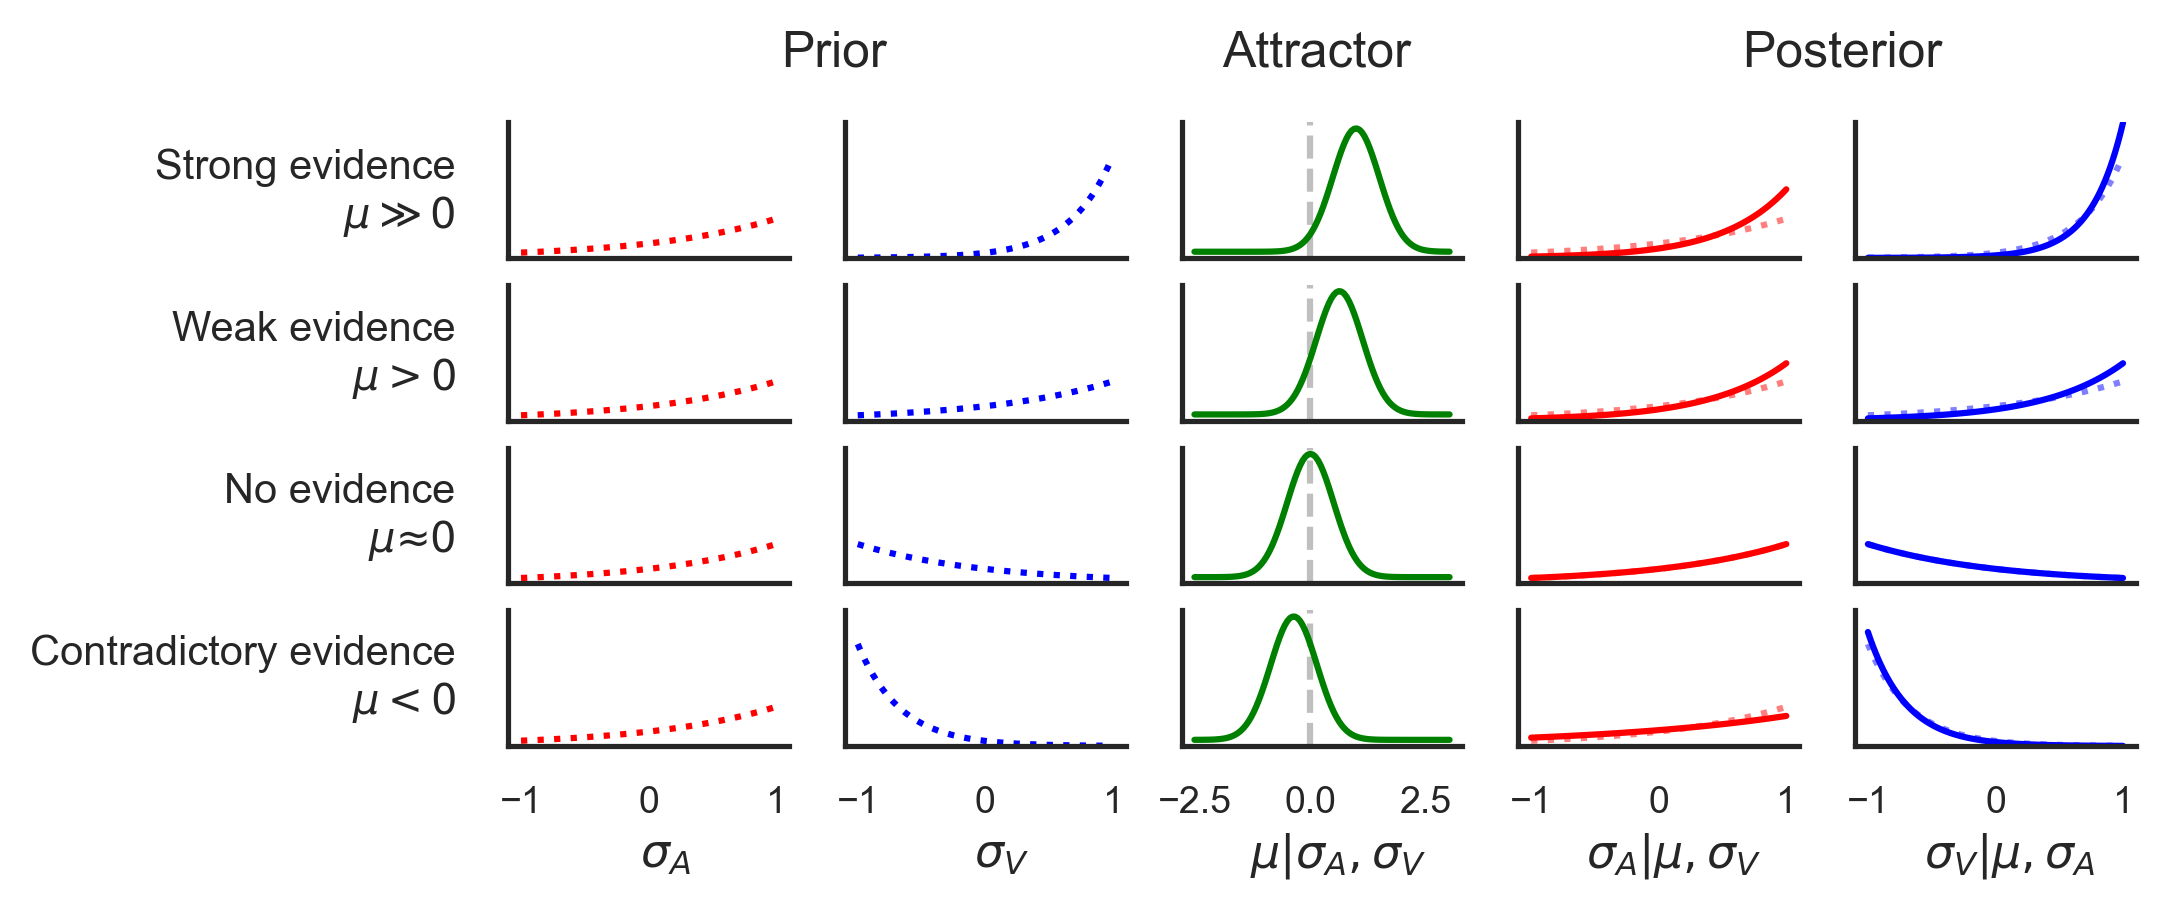

In [11]:
#| label: si-bci
import math
from scipy.stats import norm

def E_CB(b):
    return 1/np.tanh(b) - 1/b

def p_mu_given_sigma(mu, sigma_A, sigma_B, beta, w_A, w_B):
    return norm.pdf(mu, loc=w_A*sigma_A + w_B*sigma_B, scale=1/beta)

def E_mu_given_sigma(sigma_A, sigma_B, w_A, w_B):
    return w_A * sigma_A + w_B *sigma_B

def posterior_sigma_given_mu(sigma, mu, b_new, w):
    return CB(sigma, b_new + w * mu)

mu = np.linspace(-2.5, 3, 100)
sigma = np.linspace(-1, 1, 100)

plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(4, 5, figsize=(7, 2.7), dpi=300, sharey=False, sharex=False)

beta = 2
w_A = 1
w_B = 1
cases = [(1, 3), (1, 1), (1, -1), (1, -3)]

ymax=4

for i, case in enumerate(cases):
    b_A=case[0]
    b_V=case[1]
    axes[i,0].plot(sigma, CB(sigma, b_A), color='red', linestyle=':')
    axes[i,0].set_ylim([0, ymax])
    axes[i,1].plot(sigma, CB(sigma, b_V), color='blue', linestyle=':')
    axes[i,1].set_ylim([0, ymax])
    
    axes[i,2].axvline(0, color='gray', linestyle='--', alpha=0.5)
    axes[i,2].plot(mu, p_mu_given_sigma(mu, E_CB(b_A), E_CB(b_V), beta=beta, w_A=w_A, w_B=w_B), color='green')
    
    axes[i,3].plot(sigma, CB(sigma, b_A), color='red', linestyle=':', alpha=0.5)
    axes[i,4].plot(sigma, CB(sigma, b_V), color='blue', linestyle=':', alpha=0.5)
    
    axes[i,3].plot(sigma, posterior_sigma_given_mu(sigma, E_mu_given_sigma(E_CB(b_A), E_CB(b_V), w_A=w_A, w_B=w_B), b_A, w_A), color='red' )
    axes[i,3].set_ylim([0, ymax])
    axes[i,4].plot(sigma, posterior_sigma_given_mu(sigma, E_mu_given_sigma(E_CB(b_V), E_CB(b_A), w_A=w_B, w_B=w_A), b_V, w_B), color='blue' )
    axes[i,4].set_ylim([0, ymax])
    
    if i<len(cases)-1:
        for ax in axes[i,:]:
            ax.xaxis.set_ticks([])

# erase y axis ticks
for ax in axes.flatten():
    ax.yaxis.set_ticks([])

for ax in axes[i,:]:
    ax.tick_params(axis='x', labelsize=9)

# despine
sns.despine()
# text label 'foo'
fig.text(0.1, 0.75, 'Strong evidence\n$\\mu \\gg 0$', ha='right')
fig.text(0.1, 0.55, 'Weak evidence\n$\\mu > 0$', ha='right')
fig.text(0.1, 0.35, 'No evidence\n$\\mu ≈ 0$', ha='right')
fig.text(0.1, 0.15, 'Contradictory evidence\n$\\mu < 0$', ha='right')

fig.text(0.28, 0.95, 'Prior', ha='center', fontdict={'size': 12})
fig.text(0.51, 0.95, 'Attractor', ha='center', fontdict={'size': 12})
fig.text(0.76, 0.95, 'Posterior', ha='center',fontdict={'size': 12})

fig.text(0.2, -0.04, '$\\sigma_A$', ha='center', fontdict={'size': 11})
fig.text(0.36, -0.04, '$\\sigma_V$', ha='center', fontdict={'size': 11})
fig.text(0.52, -0.04, '$\\mu | \\sigma_A, \\sigma_V$', ha='center', fontdict={'size': 11})
fig.text(0.68, -0.04, '$\\sigma_A | \\mu, \\sigma_V$', ha='center', fontdict={'size': 11})
fig.text(0.84, -0.04, '$\\sigma_V | \\mu, \\sigma_A$', ha='center', fontdict={'size': 11})
plt.show()

## Supplementary Information 12

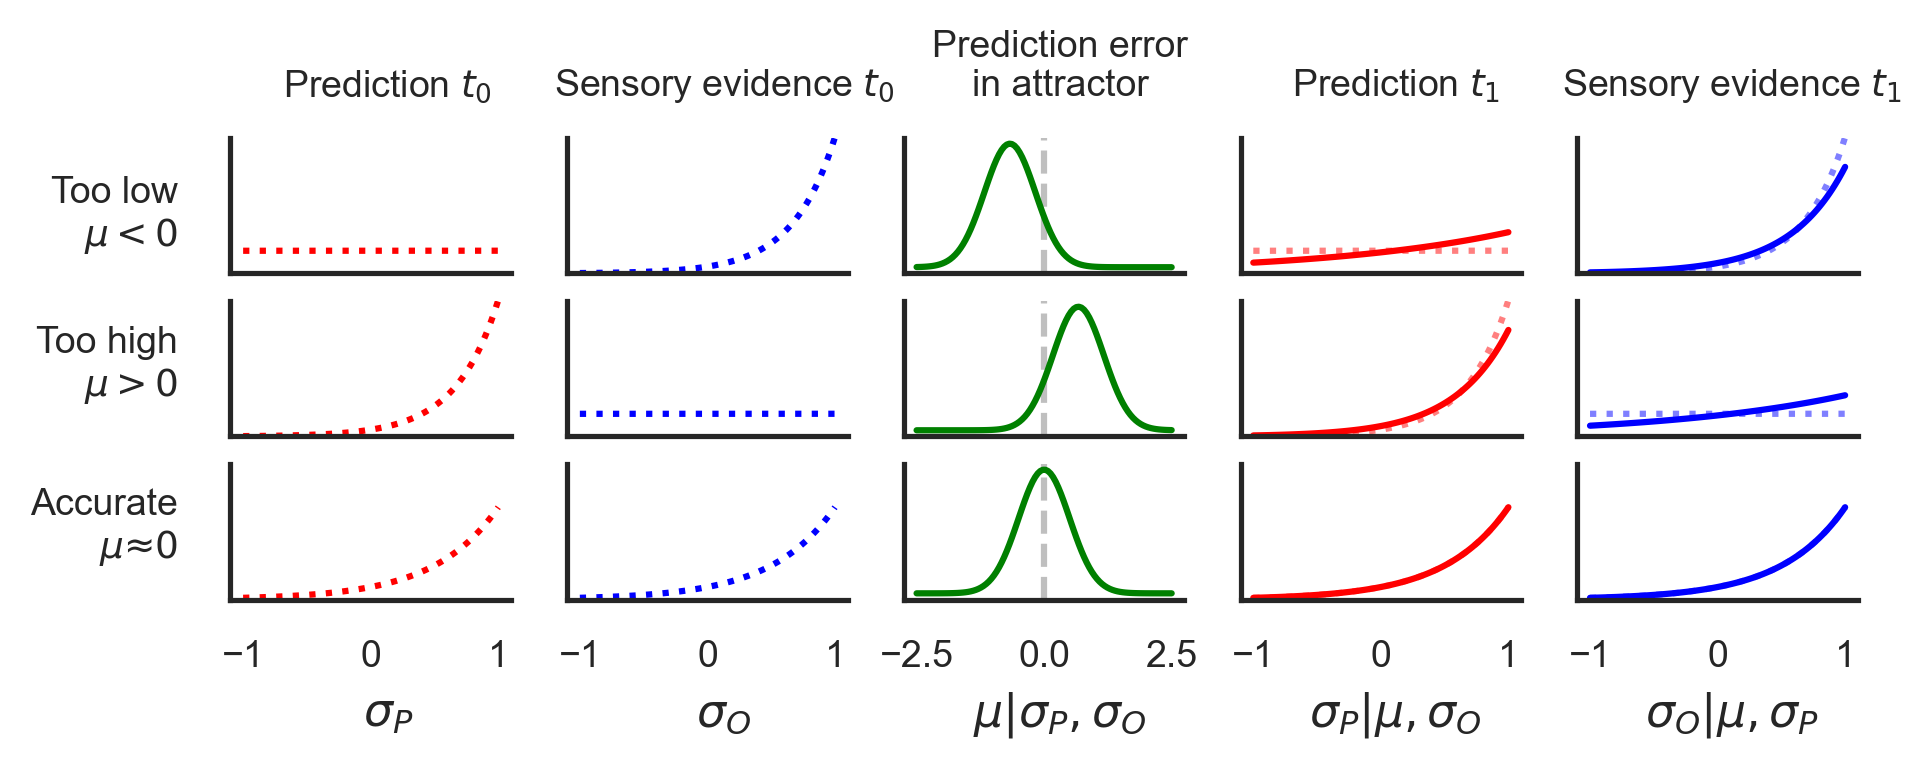

In [12]:
#| label: sipredcode
import math
def E_mu_given_sigma_neg(sigma_A, sigma_B, w_A, w_B):
    return -1*E_mu_given_sigma(sigma_A, sigma_B, w_A, w_B)  # inhibitory activation
# equivalent implementations:
# - to set a|mu to a Dirac delta shifted into the negative direction: a | mu ~ delta(-w mu)
# - to set sigma|a to CB(b-a)
# neural interpretation 1: this constructs the difference between the prediction mu and the sensory evidence sigma
# neural interpretation 2: the lower level-regions receive inhibitory input from the higher level

mu = np.linspace(-2.5, 2.5, 100)
sigma = np.linspace(-1, 1, 100)
plt.rcParams.update({'font.size': 9})
fig, axes = plt.subplots(3, 5, figsize=(7, 2), dpi=300, sharey=False, sharex=False)

beta = 2
w_A = 1
w_B = -1
cases = [(0.001, 3), (3, 0.001),(2,2)]
ymax=3

for i, case in enumerate(cases): 
    
    b_A=case[0]
    b_V=case[1]
    axes[i,0].plot(sigma, CB(sigma, b_A), color='red', linestyle=':')
    axes[i,0].set_ylim([0, ymax])
    axes[i,1].plot(sigma, CB(sigma, b_V), color='blue', linestyle=':')
    axes[i,1].set_ylim([0, ymax])
    
    axes[i,2].axvline(0, color='gray', linestyle='--', alpha=0.5)
    axes[i,2].plot(mu, p_mu_given_sigma(mu, E_CB(b_A), E_CB(b_V), beta=beta, w_A=w_A, w_B=w_B), color='green')
    
    axes[i,3].plot(sigma, CB(sigma, b_A), color='red', linestyle=':', alpha=0.5)
    axes[i,4].plot(sigma, CB(sigma, b_V), color='blue', linestyle=':', alpha=0.5)
    
    axes[i,3].plot(sigma, posterior_sigma_given_mu(sigma, mu=E_mu_given_sigma_neg(E_CB(b_A), E_CB(b_V), w_A=w_A, w_B=w_B), b_new=b_A, w=w_A), color='red' )
    axes[i,3].set_ylim([0, ymax])
    axes[i,4].plot(sigma, posterior_sigma_given_mu(sigma, mu=E_mu_given_sigma_neg(E_CB(b_V), E_CB(b_A), w_A=w_B, w_B=w_A), b_new=b_V, w=w_B), color='blue' )
    axes[i,4].set_ylim([0, ymax])

    for ax in axes[i,:]:
        ax.tick_params(axis='x', labelsize=9)
    
    if i<len(cases)-1:
        for ax in axes[i,:]:
            ax.xaxis.set_ticks([])

for ax in axes.flatten():
    ax.yaxis.set_ticks([])

sns.despine()
fig.text(0.1, 0.7, 'Too low\n$\\mu < 0$', ha='right')
fig.text(0.1, 0.45, 'Too high\n$\\mu > 0$', ha='right')
fig.text(0.1, 0.18, 'Accurate\n$\\mu ≈ 0$', ha='right')

fig.text(0.2, 0.95, 'Prediction $t_0$', ha='center', fontdict={'size': 9})
fig.text(0.36, 0.95, 'Sensory evidence $t_0$', ha='center', fontdict={'size': 9})
fig.text(0.52, 0.95, 'Prediction error\nin attractor', ha='center', fontdict={'size': 9})
fig.text(0.68, 0.95, 'Prediction $t_1$', ha='center', fontdict={'size': 9})
fig.text(0.84, 0.95, 'Sensory evidence $t_1$', ha='center', fontdict={'size': 9})

fig.text(0.2, -0.1, '$\\sigma_P$', ha='center', fontdict={'size': 11})
fig.text(0.36, -0.1, '$\\sigma_O$', ha='center', fontdict={'size': 11})
fig.text(0.52, -0.1, '$\\mu | \\sigma_P, \\sigma_O$', ha='center', fontdict={'size': 11})
fig.text(0.68, -0.1, '$\\sigma_P | \\mu, \\sigma_O$', ha='center', fontdict={'size': 11})
fig.text(0.84, -0.1, '$\\sigma_O | \\mu, \\sigma_P$', ha='center', fontdict={'size': 11})
plt.show()

<Axes: >

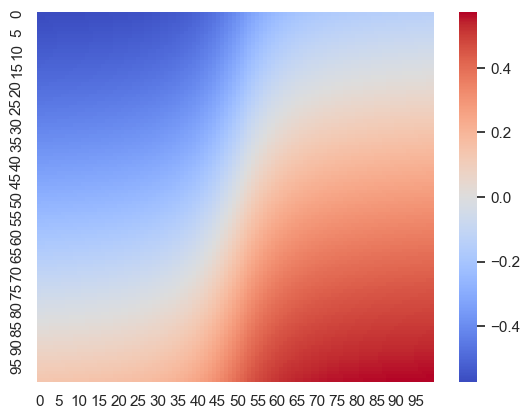

In [13]:
def E_posterior_sigma_given_mu(mu, b_new, w):
    return E_CB(b_new + w * mu)

bas = np.linspace(-1, 1, 100)
bvs = np.linspace(-10, 10, 100)
# create a heatmap
heatmap = np.zeros((100, 100))
for i, ba in enumerate(bas):
    for j, bv in enumerate(bvs):
        heatmap[i, j] = E_posterior_sigma_given_mu(E_mu_given_sigma(E_CB(ba), E_CB(bv), 1, 1 ), ba, 1)
sns.heatmap(heatmap, cmap='coolwarm')

## Supplementary Information 13

Connections required for a restricted Boltzmann Machine (RBM) with the same number of (hidden) integrator nodes as stored by Hopfield networks with various storage capacities.

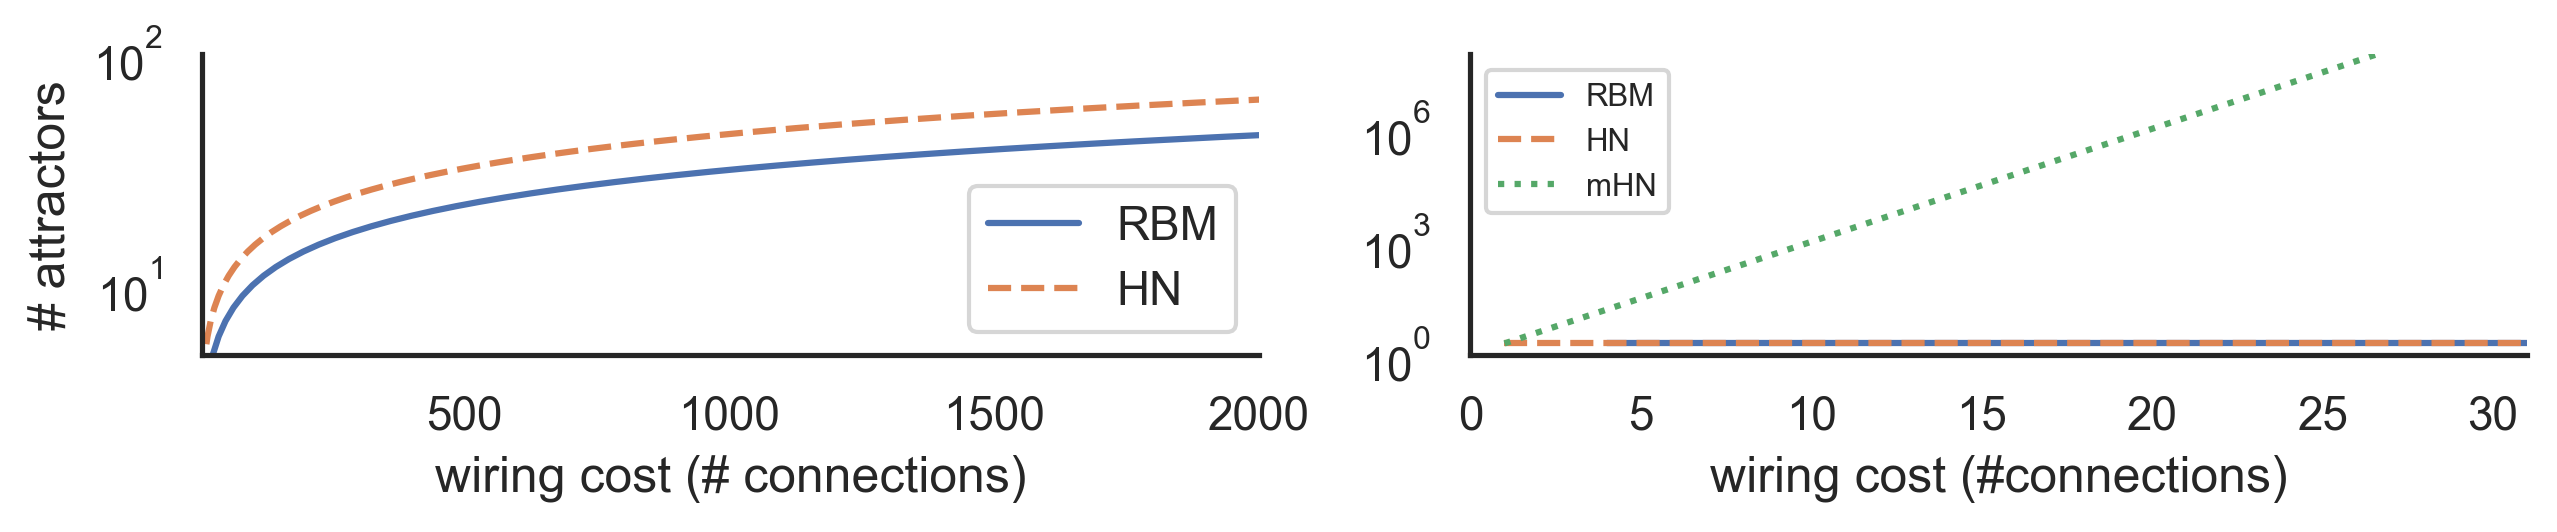

In [14]:
#| label: si-economy

n_attractors = np.linspace(4, 1000, 1000).astype(int)
cost_RBM = n_attractors * n_attractors
cost_HN = n_attractors * (n_attractors - 1) / 2 #saturating the max capacity
cost_mHN = np.log2(n_attractors) 

fig, axes = plt.subplots(1, 2, figsize=(10, 1.3), dpi=300, sharey=False, sharex=False)

axes[0].plot(cost_RBM, n_attractors, label="RBM", linestyle='-')
axes[0].plot(cost_HN, n_attractors, label="HN", linestyle='--')
axes[0].set(ylabel='# attractors')
axes[0].set(xlabel='wiring cost (# connections)')
#axes[0].set(xscale='log')
axes[0].set(yscale='log')
axes[0].set_xlim([5, 2000])
axes[0].set_ylim([5, 100])
axes[0].legend()

n_attractors = np.linspace(2, 100000000, 1000).astype(int)
cost_RBM = n_attractors * n_attractors
cost_HN = n_attractors * (n_attractors - 1) / 2 #saturating the max capacity
cost_mHN = np.log2(n_attractors) 

axes[1].plot(cost_RBM, n_attractors, label="RBM", linestyle='-')
axes[1].plot(cost_HN, n_attractors, label="HN", linestyle='--')
axes[1].plot(cost_mHN, n_attractors, label="mHN", linestyle=':')
axes[1].set(ylabel='')
axes[1].set(xlabel='wiring cost (#connections)')
#axes[1].set(xscale='log')
axes[1].set(yscale='log')
# set y limit
axes[1].set_xlim([0, 31])
axes[1].set_ylim([1, 100000000])
axes[1].legend()
axes[1].legend(fontsize='small')
sns.despine()
plt.show()